#RBF from scratch

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


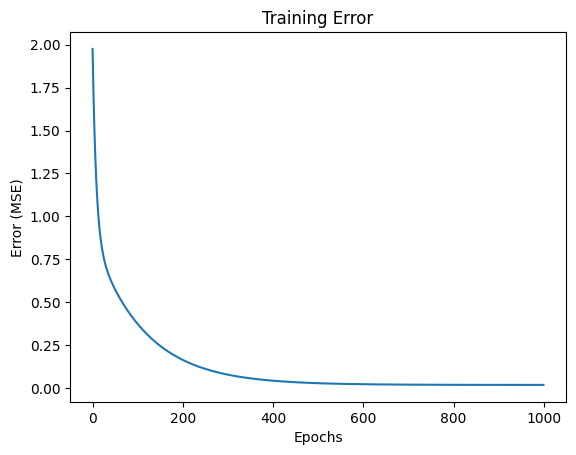

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = np.array([
    [0.1, 0.9],
    [0.2, 0.8],
    [0.3, 0.7],
    [0.9, 0.1],
    [0.9, -0.1]])
y = np.array([-1,-1,-1, 1, 1])

# [2-2-1]
def gaussian_rbf(x, c, sigma):
    return np.exp(-np.linalg.norm(x-c, axis=1)**2 / (2*sigma**2))

nHiddenNode = 2
sigma = 1
epoch = 1000
eta = 0.01

# center
kmean = KMeans(n_clusters=2, random_state=0)
kmean.fit(X)
center = kmean.cluster_centers_

# output weight
wo = np.random.uniform(0, 1, (nHiddenNode,))

# train rbf
error = []
for _ in range(epoch):
    # hidden layer
    H = np.zeros((X.shape[0], nHiddenNode))
    for i in range(nHiddenNode):
        H[:, i] = gaussian_rbf(X, center[i], sigma)

    # output layer
    y_hat = H.dot(wo)

    # update output weight
    e = y - y_hat
    wo += (eta * e).dot(H)

    # error over epoch
    H = np.zeros((X.shape[0], nHiddenNode))
    for i in range(nHiddenNode):
        H[:, i] = gaussian_rbf(X, center[i], sigma)
    y_hat = H.dot(wo)
    error.append(np.mean(np.square(y - y_hat)))

plt.plot(error)
plt.xlabel('Epochs')
plt.ylabel('Error (MSE)')
plt.title('Training Error')
plt.show()


#Random Net from scratch

In [ ]:
import numpy as np

X = np.array([
    [0.1, 0.9],
    [0.2, 0.8],
    [0.3, 0.7],
    [0.9, 0.1],
    [0.9, -0.1]])
y = np.array([-1,-1,-1, 1, 1])

def sigmoid(x): return 1 / (1 + np.exp(-x))
X = np.insert(X, 0, 1, axis=1)

nHiddenNode = 2
wi = np.random.uniform(0, 1, (X.shape[1], nHiddenNode))


# train random nn
# hidden layer

H = sigmoid(X.dot(wi))
H = np.insert(H, 0, 1, axis=1)

# compute output weight
wo = np.linalg.inv(np.dot(H.T, H)) @ H.T @ y

# use
pred = H@wo
mse = np.mean(np.square(y - pred))
print("Mse :", mse)

Mse : 0.03171801699597793


#Tasks

1.   สร้าง model RBF และ Random NN สำหรับ Iris data
2.   สร้าง model RBF และ Random NN สำหรับ Spiral data



## iris data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer

iris_data = load_iris()
X = iris_data.data
Y = iris_data.target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

scaler = MinMaxScaler().fit(X_train)
encoder = LabelBinarizer().fit(y_train)

#data for training phase
X_train = scaler.transform(X_train)
y_train = encoder.transform(y_train)

#data for testing phase
X_test = scaler.transform(X_test)
y_test = encoder.transform(y_test)

###RBF for Iris Data

In [ ]:
X_train.shape, y_train.shape

((100, 4), (100, 3))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


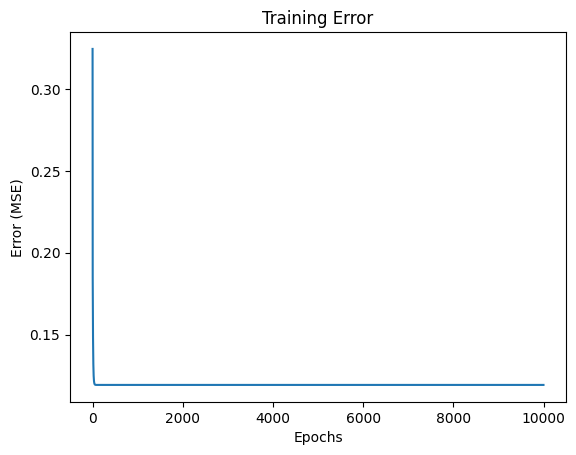

In [ ]:
#CODE
nHiddenNode = 2
nOutputNode = 3
sigma = 1
epoch = 10000
eta = 0.01

# center
kmean = KMeans(n_clusters=2, random_state=0)
kmean.fit(X_train)
center = kmean.cluster_centers_

# output weight
wo = np.random.uniform(0, 2, (nHiddenNode, nOutputNode))

# train rbf
error = []
for _ in range(epoch):
    # hidden layer
    H = np.zeros((X_train.shape[0], nHiddenNode))
    for i in range(nHiddenNode):
        H[:, i] = gaussian_rbf(X_train, center[i], sigma)

    # output layer
    y_hat = H.dot(wo)

    # update output weight
    e = y_train - y_hat
    wo += (eta * H.T).dot(e)

    # error over epoch
    H = np.zeros((X_train.shape[0], nHiddenNode))
    for i in range(nHiddenNode):
        H[:, i] = gaussian_rbf(X_train, center[i], sigma)
    y_hat = H.dot(wo)
    error.append(np.mean(np.square(y_train - y_hat)))

plt.plot(error)
plt.xlabel('Epochs')
plt.ylabel('Error (MSE)')
plt.title('Training Error')
plt.show()

In [ ]:
# predict
H = np.zeros((X_test.shape[0], nHiddenNode))
for i in range(nHiddenNode):
    H[:, i] = gaussian_rbf(X_test, center[i], sigma)
y_hat = H.dot(wo)
print("MSE with test set : %.2f"%np.mean(np.square(y_test - y_hat)))

MSE with test set : 0.11


###Random NN for Iris Data

In [ ]:
#CODE
nHiddenNode = 2
X_bias = np.insert(X_train, 0, 1, axis=1)
wi = np.random.uniform(0, 2, (X_bias.shape[1], nHiddenNode))

# train random nn
# hidden layer
H = sigmoid(X_bias.dot(wi))
H = np.insert(H, 0, 1, axis=1)

# compute output weight
wo = np.linalg.inv(np.dot(H.T, H)) @ H.T @ y_train

# use
pred = H@wo
mse = np.mean(np.square(y_train - pred))
print("MSE for train data : %.2f"% mse)

MSE for train data : 0.11


In [ ]:
X_bias = np.insert(X_test, 0, 1, axis=1)
H = sigmoid(X_bias.dot(wi))
H = np.insert(H, 0, 1, axis=1)
pred = H@wo
print("MSE for test data : %.2f"% np.mean(np.square(y_test - pred)))

MSE for test data : 0.10


##spiral data

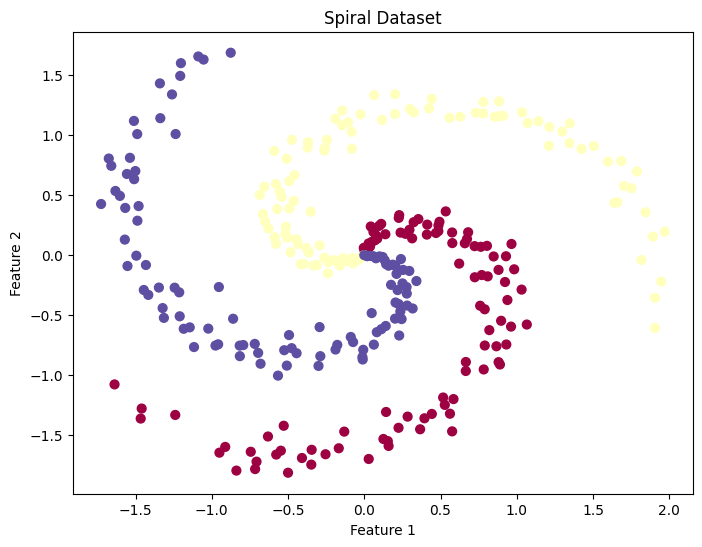

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

def create_spiral_data(points, classes):
    X = np.zeros((points*classes, 2))  # Data matrix (each row = single example)
    y = np.zeros(points*classes, dtype='uint8')  # Class labels

    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 2, points)  # Radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2  # Theta
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = class_number

    return X, y

# Parameters
points_per_class = 100
number_of_classes = 3

# Generate dataset
X, y = create_spiral_data(points_per_class, number_of_classes)

# Plot dataset
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.title("Spiral Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [ ]:
scaler = MinMaxScaler().fit(X)
encoder = LabelBinarizer().fit(y)

#data for training phase
X_train = scaler.transform(X)
y_train = encoder.transform(y)

In [ ]:
X_train.shape, y_train.shape

((300, 2), (300, 3))

### RBF for Spiral data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


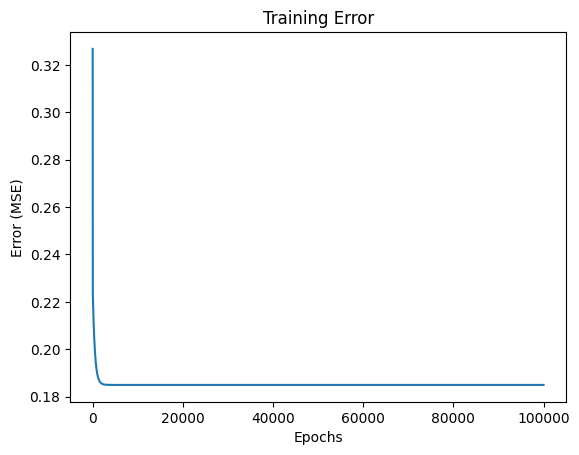

In [ ]:
#CODE
#CODE
nHiddenNode = 2
nOutputNode = 3
sigma = 1
epoch = 100000
eta = 0.001

# center
kmean = KMeans(n_clusters=2, random_state=0)
kmean.fit(X_train)
center = kmean.cluster_centers_

# output weight
wo = np.random.uniform(0, 1, (nHiddenNode, nOutputNode))

# train rbf
error = []
for _ in range(epoch):
    # hidden layer
    H = np.zeros((X_train.shape[0], nHiddenNode))
    for i in range(nHiddenNode):
        H[:, i] = gaussian_rbf(X_train, center[i], sigma)

    # output layer
    y_hat = H.dot(wo)

    # update output weight
    e = y_train - y_hat
    wo += (eta * H.T).dot(e)

    # # error over epoch
    H = np.zeros((X_train.shape[0], nHiddenNode))
    for i in range(nHiddenNode):
        H[:, i] = gaussian_rbf(X_train, center[i], sigma)
    y_hat = H.dot(wo)
    error.append(np.mean(np.square(y_train - y_hat)))

plt.plot(error)
plt.xlabel('Epochs')
plt.ylabel('Error (MSE)')
plt.title('Training Error')
plt.show()

### Random NN for Spiral data

In [ ]:
#CODE
nHiddenNode = 2
X_bias = np.insert(X_train, 0, 1, axis=1)
wi = np.random.uniform(0, 1, (X_bias.shape[1], nHiddenNode))

# train random nn
# hidden layer
H = sigmoid(X_bias.dot(wi))
H = np.insert(H, 0, 1, axis=1)

# compute output weight
wo = np.linalg.inv(np.dot(H.T, H)) @ H.T @ y_train

# use
pred = H@wo
mse = np.mean(np.square(y_train - pred))
print("MSE for testing data : %.2f"% mse)

MSE for testing data : 0.16
